In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/bhl

Mounted at /gdrive
/gdrive/MyDrive/bhl


In [2]:
import pandas as pd

final_train = pd.read_csv('final_train.csv')
final_train = final_train.drop(['Unnamed: 0'], axis = 1)

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(123)
test_size = 8
subjects = final_train['subject'].unique()
removed_subjects = [28, 9]
subjects = [x for x in subjects if x not in removed_subjects]
test_subjects = list(np.random.choice(subjects, size = test_size, replace=False))
train_subjects = [x for x in subjects if x not in test_subjects]

In [10]:
ftrain = final_train.query('subject in @train_subjects').drop('subject', axis = 1)
ftest = final_train.query('subject in @test_subjects').drop('subject', axis = 1)

In [12]:
target = 'Activity'


x_train, y_train = ftrain[ftrain.columns.difference([target])], ftrain[target]
x_test, y_test = ftest[ftest.columns.difference([target])], ftest[target]

In [13]:

from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(f'model has {accuracy_score(y_test, y_pred)} acc')

model has 0.9377674056787242 acc


In [14]:
def plot_cm(test_y, y_pred):
  import numpy as np
  import seaborn as sns
  import pandas as pd
  from sklearn import metrics
  labels = sorted(np.unique(test_y))
  cm = metrics.confusion_matrix(test_y, y_pred)
  df = pd.DataFrame(cm, index = labels, columns = labels)
  ax = sns.heatmap(df, annot=True, fmt='d')
  ax.set_title('Confusion matrix')
  ax.set_xlabel('True label')
  ax.set_ylabel('Prediction')
  return ax

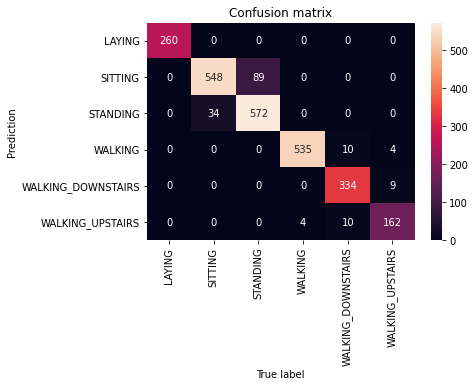

In [15]:
plot_cm(y_test, y_pred)